<a href="https://colab.research.google.com/github/bakseo0/ai-sec-2020/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np

In [8]:
def build_model(width, height, channel):
    model = Sequential() #초기화 
    
    model.add(Conv2D( #레이어에 대한 정보
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel) #첫번째 레이어에는 input_shpae을 넣어줘야함.
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D( #MaxPooling 사이즈가 반으로 줄어든다. 
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(AveragePooling2D( #평균값
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001) #Adam optimizer
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model

In [9]:
def data_preprocessing():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    mean=[0,0,0]
    std=[0,0,0]
    newX_train = np.ones(X_train.shape)
    newX_test = np.ones(X_test.shape)
    #train set에 있는 데이터로만 평균과 표준편차를 구함
    for i in range(3):
        mean[i] = np.mean(X_train[:,:,:,i])
        std[i] = np.std(X_train[:,:,:,i])

    #train과 test셋 모두 정규화 작업    
    for i in range(3):
        newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
        newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
        newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
        newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
            
    X_train = newX_train
    X_test = newX_test

    return (X_train, Y_train), (X_test, Y_test)

In [10]:
#(X_train, Y_train), (X_test, Y_test) = data_preprocessing()
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


model = build_model(X_train.shape[1],X_train.shape[2],X_train.shape[3] )

hist = model.fit( #학습 Epoch
    X_train, Y_train, 
    batch_size=64, #64개마다 1번씩 학습 (보통 64를 많이 사용), 학습 속도 향상, 2의 n승 형태로 사용
    epochs=40, 
    verbose=1, #1로 설정
    shuffle=True, 
    validation_split=0.15 #학습데이터의 0.15
)

model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/40
665/665 [==============================] - 81s 121ms/step - loss: 1.6252 - accuracy: 0.3984 - val_loss: 1.4158 - val_accuracy: 0.4931
Epoch 2/40
665/665 [==============================] - 82s 124ms/step - loss: 1.2145 - accuracy: 0.5615 - val_loss: 1.1912 - val_accuracy: 0.5689
Epoch 3/40
665/665 [==============================] - 82s 124ms/step - loss: 1.0375 - accuracy: 0.6293 - val_loss: 1.0232 - val_accuracy: 0.6444
Epoch 4/40
665/665 [==============================] - 82s 123ms/step - loss: 0.9476 - accuracy: 0.6640 - val_loss: 0.9190 - val_accuracy: 0.6719
Epoch 5/40
665/665 [==============================] - 82s 123ms/step - loss: 0.8698 - accuracy: 0.6909 - val_loss: 1.0050 - val_accuracy: 0.6564
Epoch 6/40
665/665 [==============================] - 82s 124ms/step - loss: 0.8137 - accuracy: 0.7115 - val_loss: 0.8417 - val_accuracy: 0.7108
Epoch 7/40
665/665 [==============================] - 82s 124ms/step - loss: 0.7633 - accuracy: 0.7302 - val_loss: 0.7968 - val_ac

[1.325036883354187, 0.729200005531311]

In [11]:
import matplotlib.pyplot as plt

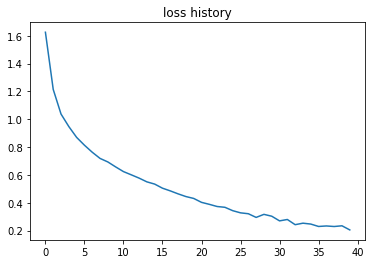

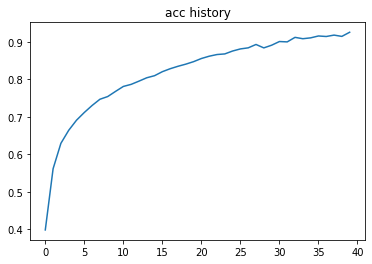

In [12]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()